En breve resumen hoy vamos a ver visualizaciones y cómo hacer un bot de Telegram.

#Comenzamos

## Visualización


El objetivo principal de la visualización de datos es comunicar información o ideas complejas de forma clara, precisa y eficiente, de forma que ayude a los usuarios a analizar y razonar sobre datos y evidencias.

La visualización de datos es a la vez un arte y una ciencia, como dice el refrán "una imagen vale más que mil palabras", o adaptada a nuestros tiempos "una imagen vale más que mil líneas de datos".

De forma resumida, podríamos indicar que los cuatro puntos clave para hacer una visualización serían:

- Tener un Dataset limpio: Disponer de un conjunto de datos limpio en el formato adecuado para la mayoría de herramientas de visualización.
- Único mensaje comunicativo: Seleccionar un único mensaje, que destacaremos en cada gráfico. Según la audiencia, el tipo de gráfico y el nivel de precisión necesario.
- Elegir la gráfica adecuada: La forma que adopta una gráfica va en función de lo que queremos transmitir: por ejemplo comparar, distribuir, etc.
- Diseño y color: Destacar lo que interesa y lo que no, mediante el uso del color.

![visualizaciones.jpg](https://drive.google.com/uc?export=view&id=17k8eUIoBrbw-MM2p50i0m453ToN6Ikoy)

## Visualización  en Python

Para visualizar datos en Python tenemos diferentes librerías como Maplotlib, Plotly o Seaborn.

Aquí nos vamos a centrar Matplotlib, seguramente la más típica de todas, la más usada con el que se pueden conseguir representaciones de calidad.

La web de la cual se descargan los datos en esta ocasión es https://ourworldindata.org/coronavirus-data, son datos mundiales que nos muestran la evolución de la pandemia.

Antes de nada vamos a volver a tratar con Pandas para analizar los datos que se nos da. En este caso los datos son del covid. Los cargamos con el siguiente código que nos generaba un Dataframe de Pandas y lo almacenamos en una variable que llamamos datos.

In [38]:
import pandas as pd

# Acuérdense que por defecto se va a separar por comas al leer el csv si no se le indica nada

# datos = pd.read_csv('owid-covid-data.csv', sep=',') 
datos = pd.read_csv('https://raw.githubusercontent.com/SerDiaz/Introduccion_programacion_en_python/main/dia4/owid-covid-data.csv') 

datos

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59916,NaN,NaN,International,2020-11-26,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59917,NaN,NaN,International,2020-11-27,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59918,NaN,NaN,International,2020-11-28,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59919,NaN,NaN,International,2020-11-29,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analizamos los datos un poquito antes de tratarlos. Vamos a ver las columnas que forman esos valores.

In [39]:
datos.columns.values

array(['iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'stringency_index', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty'

Como primer ejemplo vamos a visualizar los datos de España. Para ello hacemos una condición donde solo obtengamos los datos cuando la "location" sea España. Con la sintaxis que vimos ayer.

In [40]:
datos_españa = datos[datos['location'] == 'Spain']
datos_españa

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
16906,ESP,Europe,Spain,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
16907,ESP,Europe,Spain,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
16908,ESP,Europe,Spain,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
16909,ESP,Europe,Spain,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
16910,ESP,Europe,Spain,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17214,ESP,Europe,Spain,2020-11-26,1617355.0,12289.0,10825.857,44374.0,337.0,297.571,34592.290,262.839,231.545,949.079,7.208,6.365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
17215,ESP,Europe,Spain,2020-11-27,1628208.0,10853.0,10211.143,44668.0,294.0,292.714,34824.416,232.126,218.398,955.367,6.288,6.261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
17216,ESP,Europe,Spain,2020-11-28,1628208.0,0.0,10211.143,44668.0,0.0,292.714,34824.416,0.000,218.398,955.367,0.000,6.261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
17217,ESP,Europe,Spain,2020-11-29,1628208.0,0.0,10211.143,44668.0,0.0,292.714,34824.416,0.000,218.398,955.367,0.000,6.261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891


## Gráfica de línea

Ahora vamos a hacer una gráfica sencilla de la evolución de los casos desde el inicio hasta hoy en día

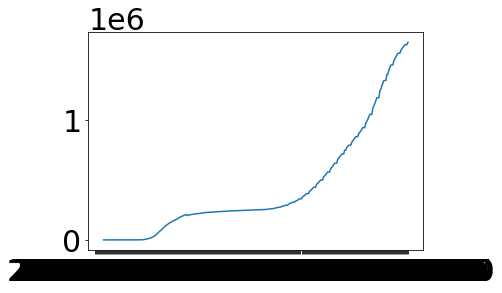

In [41]:
import matplotlib.pyplot as plt

# Hacer el recuadro más grande
x = datos_españa['date']
y = datos_españa['total_cases']
plt.plot(x, y)
plt.show()


Aquí tenemos la evolución de los casos positivos en España, donde en el eje Y tenemos la cantidad de casos totales y en el eje X las fechas.

Como vemos, el eje Y vienen dado por 1.50 pero por arriba se indica que elevado a la sexta (hablamos de millones). El eje X se muy mal. Vamos a ir arreglándolo. Por ejemplo vamos a empezar por hacerlo más grande. Eso lo hacemos con el metodo plt.figure() y le indicamos el nuevo tamaño.

También vamos a hacer el grosor de la línea mayor con el parámetro **lw** . Es un parámetro de la función plot(). Y a su vez al figura le añadimos el parámetro **figsize** para hacerlo más grande.

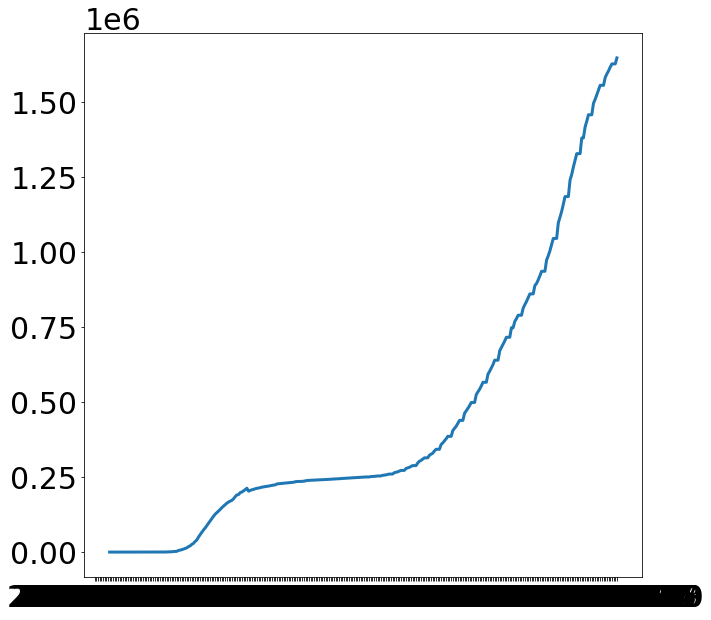

In [42]:
import matplotlib.pyplot as plt

# Hacer el recuadro más grande
plt.figure(figsize=(10,10))
x = datos_españa['date']
y = datos_españa['total_cases']
plt.plot(x, y, lw=3) # Hacemos el grosor de la línea mayor con lw
plt.show()

Seguimos viéndolo fatal las fechas en el Eje X. Los ejes se pueden modificar. Para ello creamos un objeto axes mediante el método **add_axes**. Este va a sustituir los ejes por defecto y nos permiten modificarlo.

*ax = fig.add_axes()*

Ahora sí, vamos primeramente a optar por indicar sólo 3 fechas en el eje X: el inicio, una fecha entre medio y el final. Para ello vamos a usar un método llamado **set_xticks()** al que hay que pasarle una lista de números. Por tanto le pasaremos:
- La posición 0. La primera posición. 
- La última posición con *len(datos_españa)-1*. len() esto nos devolvía la cantidad de elementos que hay en la lista y menos 1 porque si hay 10 elementos en la lista los índices van de 0 a 9.
- Y el elemento intermedio con (len(datos_españa)-1)/2. Siguiendo la lógica de antes, sólo que ahora queremos la mitad justa y por eso dividir entre 2)

Por tando **ax.set_xticks([f_ini, f_med, f_fin])** , donde f_ini es la posición de la fecha inicio, la posición de la f_med es fecha media y f_fin la posición de la fecha final 

** Acuerdate que para ver la **len()** es una función que se usa para ver los tamaños de las listas. Ejemplo, sabiendo que cada fila es un día, vamos a ver cuántos almacenados días en los datos:

In [43]:
len(datos_españa)

313

Ahora sí, vamos a mostrar la gráfica

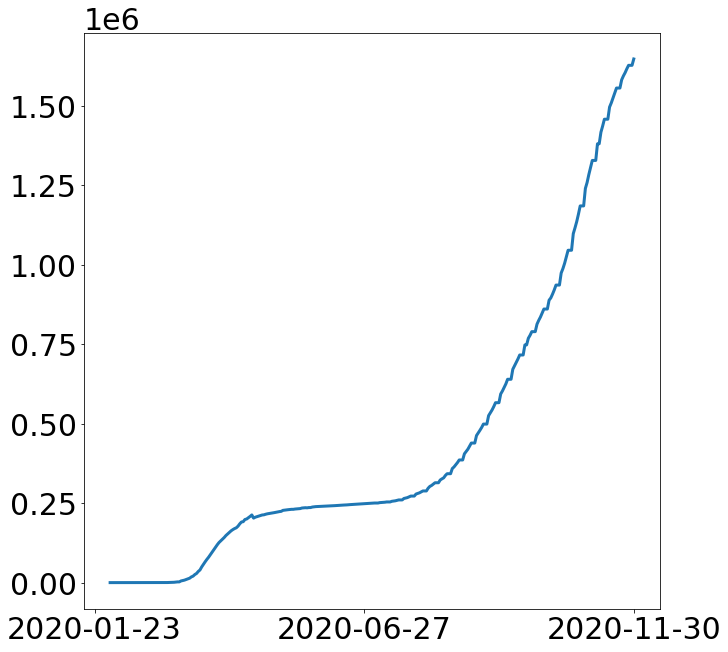

In [44]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt

x = datos_españa['date']
y = datos_españa['total_cases']

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Este parámetro son las dimensiones [left, bottom, width, height] 
                                        # de los nuevos ejes.

# Vamos a indicar tres datos del eje x
f_ini = 0
f_med = (len(datos_españa)-1) /2
f_fin = len(datos_españa)-1

# Le añadimos los tres elementos que vamos a mostrar.
ax.set_xticks([f_ini, f_med, f_fin])

plt.plot(x, y, lw=3)

# Guardar imágenes
# plt.savefig("name.png")
plt.show() 

# Y si quisiéramos descargar la gráfica desde colab a nuestro ordenador
# from google.colab import files
# files.download("name.png")



Ya no tenemos problemas, pero vamos a colocarlo mejor, porque todavía nos quedan muchas cosas que podrían ser más claras. Primeramente empezaremos por incluir nombre a los ejes y la gráfica.

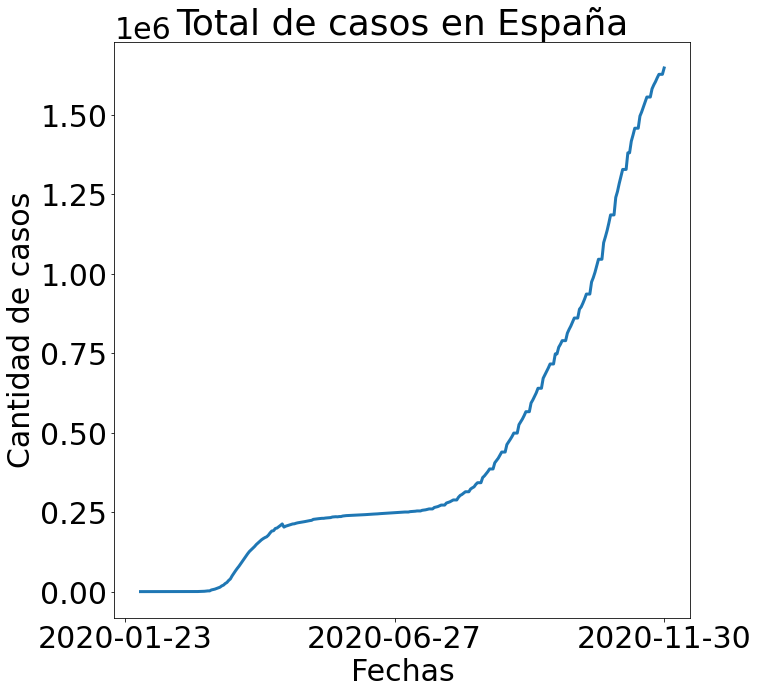

In [45]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt

x = datos_españa['date']
y = datos_españa['total_cases']

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Este parámetro son las dimensiones [left, bottom, width, height] 
                                        # de los nuevos ejes.
ax.set_xlabel('Fechas') # nombre eje x 
ax.set_ylabel('Cantidad de casos') # nombre eje y
ax.set_title('Total de casos en España') # nombre gráfica

# Vamos a indicar tres datos del eje x
f_ini = 0
f_med = (len(datos_españa)-1) /2
f_fin = len(datos_españa)-1

ax.set_xticks([f_ini, f_med, f_fin])

plt.plot(x, y, lw=3)
plt.show()

Ahora por último a sustituir los valores de Y por texto para que se entienda mejor.

Usamos de nuevo **set_yticks**, para indicar los rangos a visualizar, pero también usamos **set_yticklabels** para poner los nombres

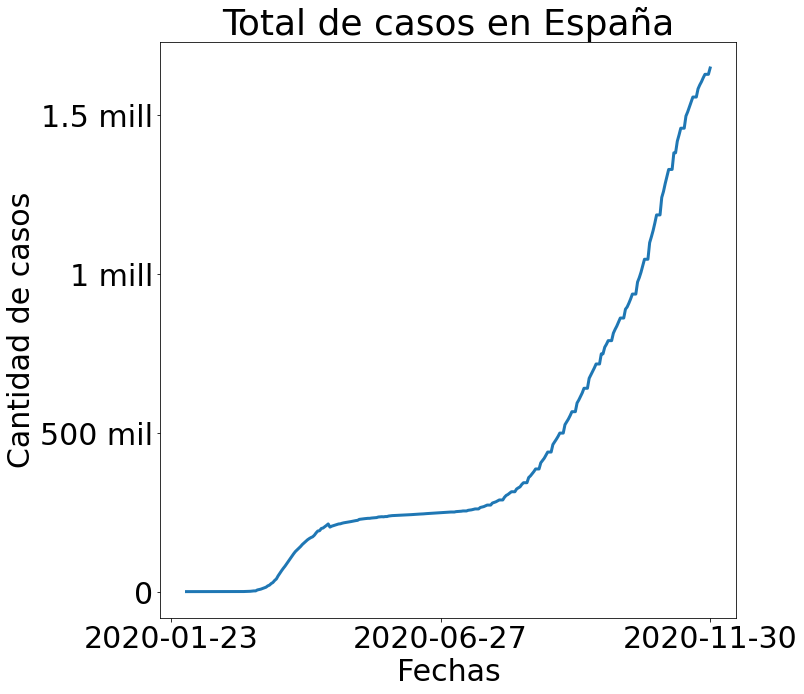

In [46]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt

x = datos_españa['date']
y = datos_españa['total_cases']

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.set_xlabel('Fechas') # nombre eje x 
ax.set_ylabel('Cantidad de casos') # nombre eje y
ax.set_title('Total de casos en España') # nombre gráfica

# Vamos a indicar tres datos del eje x
f_ini = 0
f_med = (len(datos_españa)-1) /2
f_fin = len(datos_españa)-1

ax.set_xticks([f_ini, f_med, f_fin])
ax.set_yticks([0,500000,1000000,1500000])
ax.set_yticklabels(['0','500 mil','1 mill', '1.5 mill'])

plt.plot(x, y, lw=3)
plt.show() # or plt.savefig("name.png")
fig.savefig("total_es_3.png") # Calidad resolucion

¿Que por qué hemos puesto ese **fig.savefig("grafica_string.png")** para almacenar la imagen?
![c3_4.png](https://drive.google.com/uc?export=view&id=1dLgV8CZbllD2uZt61nRP-FIYlDNhr6f0)


## Formato fecha

Ahora en vez de visualizar las fechas así queremos ver en los ejes cada mes. Las fechas que aparecen están guardadas en formato str (texto). Acuérdate que para ver el tipo de datos usamos **type()**

In [47]:
# Imprimimos el tipo del campo date, por ejemplo en la primera fila para ver qué es
(datos_españa['date'].iloc[0])

'2020-01-23'

Vamos a transformar eso a un formato fecha. Python no tiene incorporado ninguna librería de fechas directamente, pero hay muchísimas. La más típica en python en *datetime*. Pandas ya incluye directamente un método que te transforma a fecha sin necesidad de importar esa librería, **to_datetime**. En este caso la librería a lo que está transformando es *timestamp* que es otra librería de tiempo similar a datetime que usa Pandas.

Vamos a cambiar el formato fecha de todo dataframe. Luego volvemos a crear el dataframe "datos_españa" como antes.

Para transformar el tiempo hay que tener en cuenta el formato. Según vimos arriba cada fecha sigue algo como año-mes-día, más concretamente, un YYYY-MM-DD, se lo tenemos que indicar para que sepa que hay guiones que separan los elementos de la fecha y además como viene representado el año, los meses y el día. Para ello usamos el **format='%Y-%m-%d'** que veremos abajo, donde %Y representa YYYY, %m MM y %d DD.

In [48]:
datos['date'] =  pd.to_datetime(datos['date'], format='%Y-%m-%d') # Transformamos formato datos
datos_españa = datos[datos['location'] == 'Spain'] # Reasignamos de nuevos los datos de España, ahora con el formato
                                                   # del tiempo como datetime

# Imprimos y observamos que ya el dtype es diferente
type(datos_españa['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Lo que nos interesa para representar por el primer día por mes es obtener los datos de la fecha por separado. Para ello ver siguiente bloque.

In [49]:
print('El año de la primera fila es',datos_españa['date'].iloc[0].year)
print('El mes de la primera fila es',datos_españa['date'].iloc[0].month)
print('El día de la primera fila es',datos_españa['date'].iloc[0].day)

El año de la primera fila es 2020
El mes de la primera fila es 1
El día de la primera fila es 23


Vemos que solo tenemos que añadir un ".year", ".month" o ".day" para obtener el elemento en concreto. También podría ser ".hour", ".minute", ".second", si se diese el caso, aunque ahora valdra cero cualquiera de ellos.

Mas de datetime:

- https://docs.python.org/es/3/library/datetime.html
- https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Timestamp.html

Bien, una vez dicho que son fechas, al datetime ya no hay que indicarle más. Ya sabrá tratar las fechas de forma correcta para que se visualice bien. Cogiendo el código de antes.

Ahora además vamos a cambiar el tamaño de las letras para que se vean más grandes con **mpl.rcParams['font.size']**

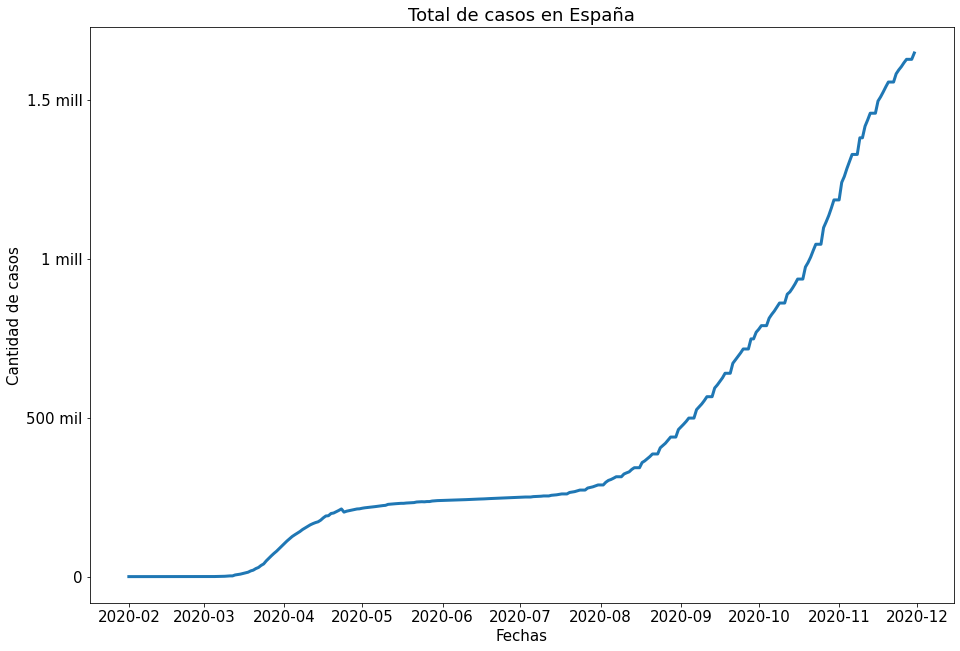

In [50]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 15.0

x = datos_españa['date']
y = datos_españa['total_cases']

fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2]) # main axes

ax.set_xlabel('Fechas') # nombre eje x 
ax.set_ylabel('Cantidad de casos') # nombre eje y
ax.set_title('Total de casos en España') # nombre gráfica

ax.set_yticks([0,500000,1000000,1500000])
ax.set_yticklabels(['0','500 mil','1 mill', '1.5 mill'])

plt.plot(x, y, lw=3)
plt.show()

Podemos poner alias tamnbién en el eje X. 

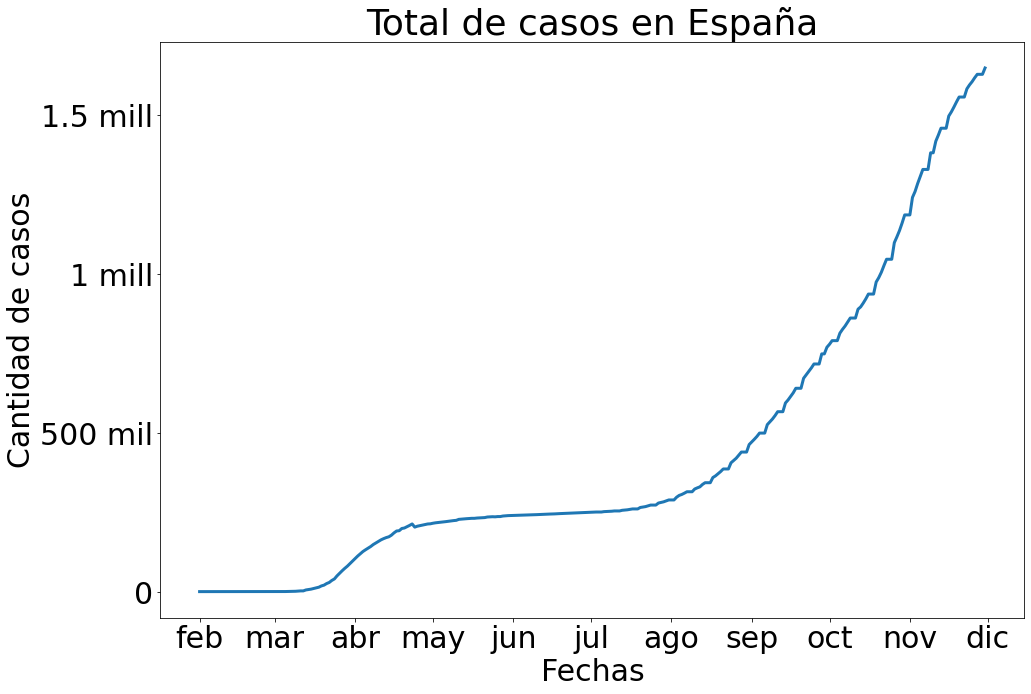

In [51]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 30.0

x = datos_españa['date']
y = datos_españa['total_cases']

fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2]) # main axes

ax.set_xlabel('Fechas') # nombre eje x 
ax.set_ylabel('Cantidad de casos') # nombre eje y
ax.set_title('Total de casos en España') # nombre gráfica

ax.set_xticklabels(['feb','mar','abr','may','jun',
                    'jul','ago','sep','oct','nov', 'dic'])

ax.set_yticks([0,500000,1000000,1500000])
ax.set_yticklabels(['0','500 mil','1 mill', '1.5 mill'])

plt.plot(x, y, lw=3)
plt.show()
fig.savefig("total_es_mes.png")

### Ejercicio 1 
Visualizar la evolución no de los casos totales sino de los casos nuevos.

In [52]:
# Resolver

## Más de una línea

Ahora vamos a comparar los datos de España con los de otros países. Por ejemplo, Italia, Alemania, Francia y Reino Unido. Tenemos que añadir un **plt.plot()** por cada país.

In [53]:
datos_italia = datos[datos['location'] == 'Italy']
datos_alemania = datos[datos['location'] == 'Germany']
datos_francia = datos[datos['location'] == 'France']
datos_reinoUnido = datos[datos['location'] == 'United Kingdom']

<Figure size 432x288 with 0 Axes>

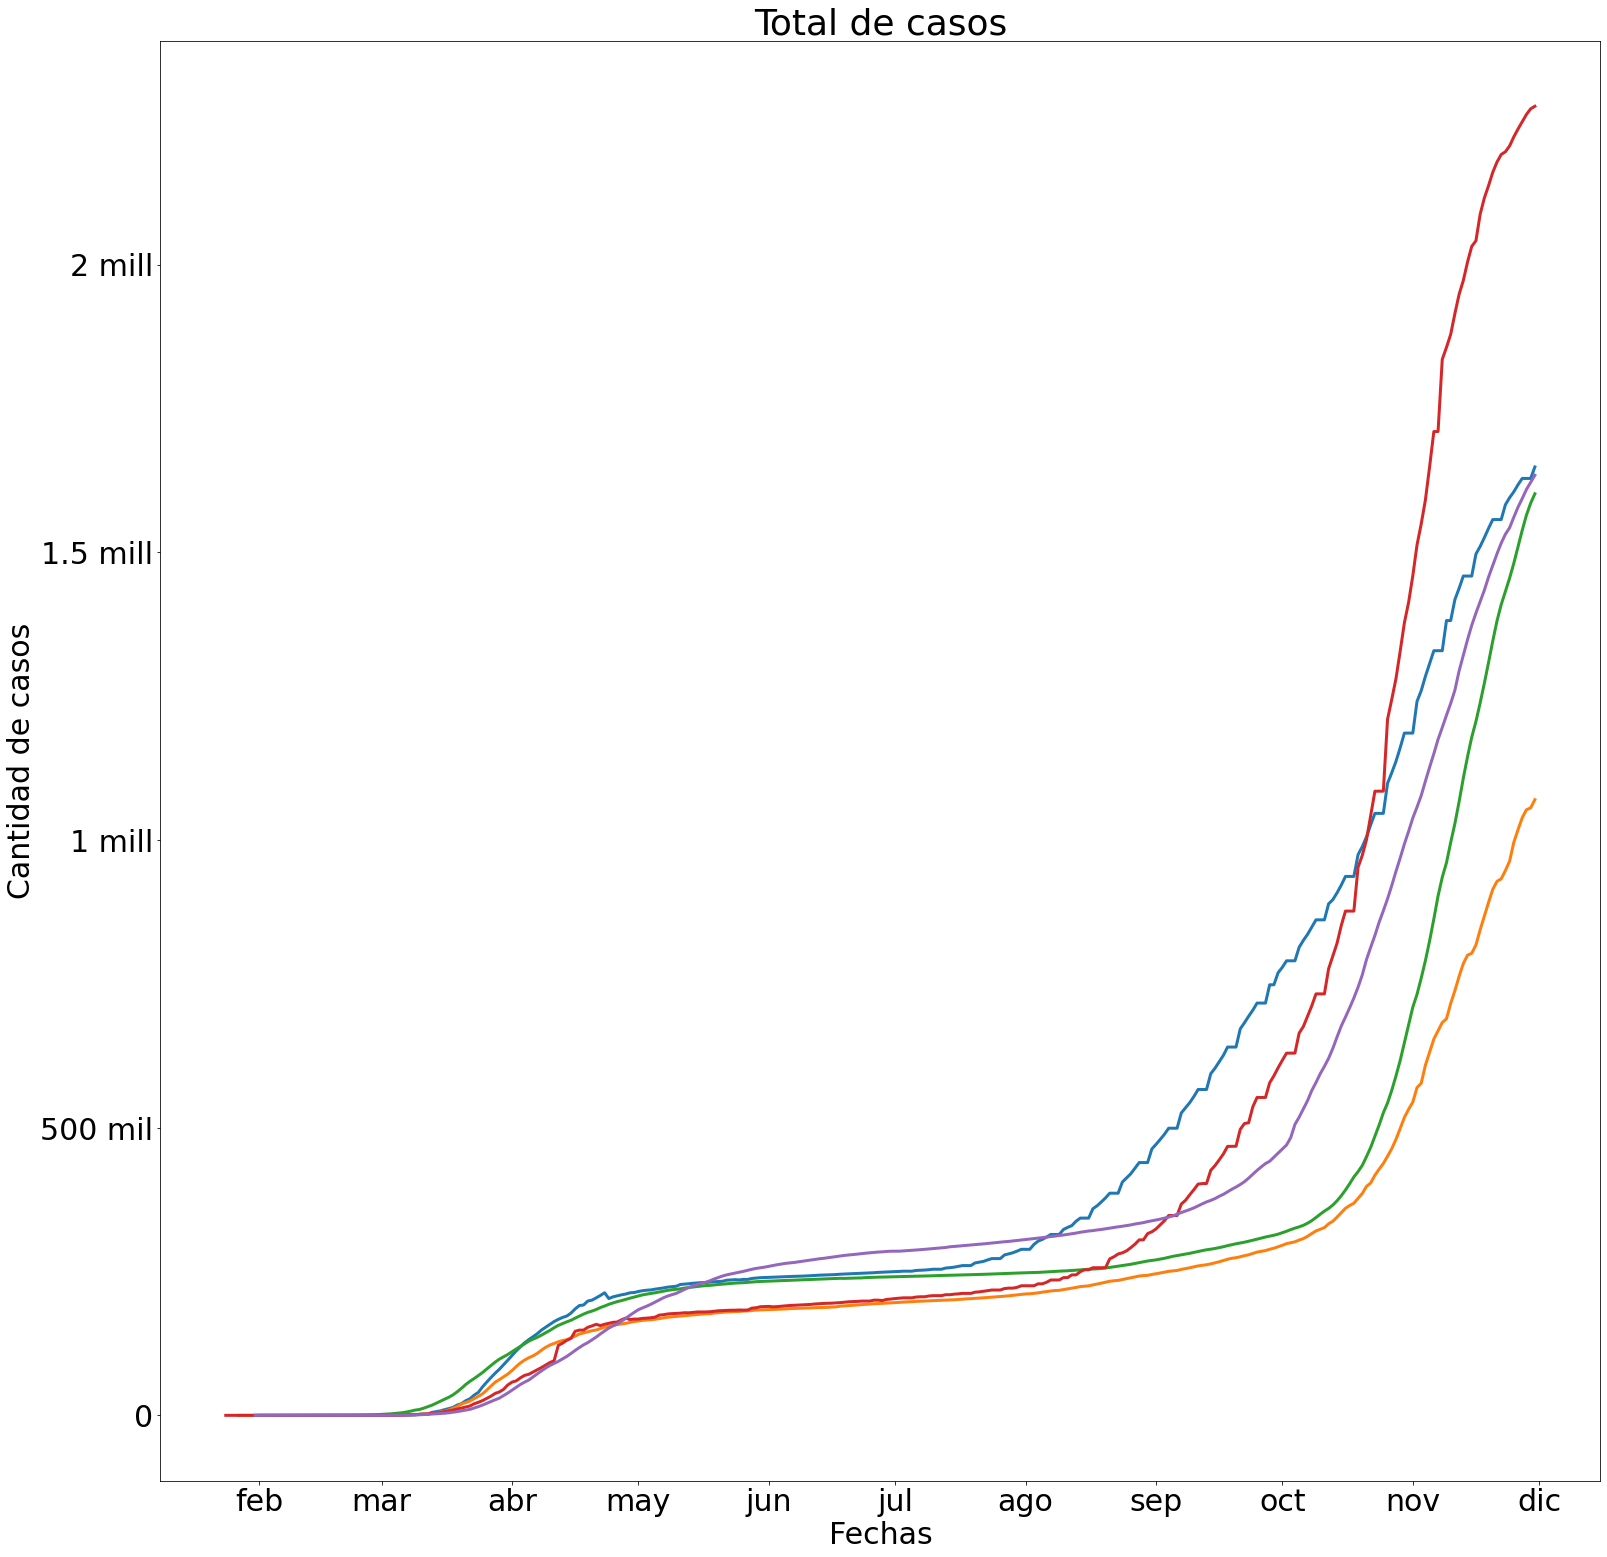

In [54]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0

x_es = datos_españa['date']
x_it = datos_italia['date']
x_ger = datos_alemania['date']
x_fr = datos_francia['date']
x_uk = datos_reinoUnido['date']

y_es = datos_españa['total_cases']
y_it = datos_italia['total_cases']
y_ger = datos_alemania['total_cases']
y_fr = datos_francia['total_cases']
y_uk = datos_reinoUnido['total_cases']

fig = plt.figure()
fig = plt.figure(figsize=(10,10))

ax = fig.add_axes([1, 1, 2, 2]) # main axes

ax.set_xlabel('Fechas') # nombre eje x 
ax.set_ylabel('Cantidad de casos') # nombre eje y
ax.set_title('Total de casos') # nombre gráfica

ax.set_xticklabels(['feb','mar','abr','may','jun',
                    'jul','ago','sep','oct','nov', 'dic'])

ax.set_yticks([0,500000,1000000,1500000, 2000000])
ax.set_yticklabels(['0','500 mil','1 mill', '1.5 mill', '2 mill'])

plt.plot(x_es, y_es, lw=3)
plt.plot(x_ger, y_ger, lw=3)
plt.plot(x_it, y_it, lw=3)
plt.plot(x_fr, y_fr, lw=3)
plt.plot(x_uk, y_uk, lw=3)

plt.show()

El problema aquí es que no entendemos de qué país es cada línea. Añadimos el argumento "label" a cada **plot()** y por último el **plt.legend()** para que se visualice la leyenda con los diferentes países.

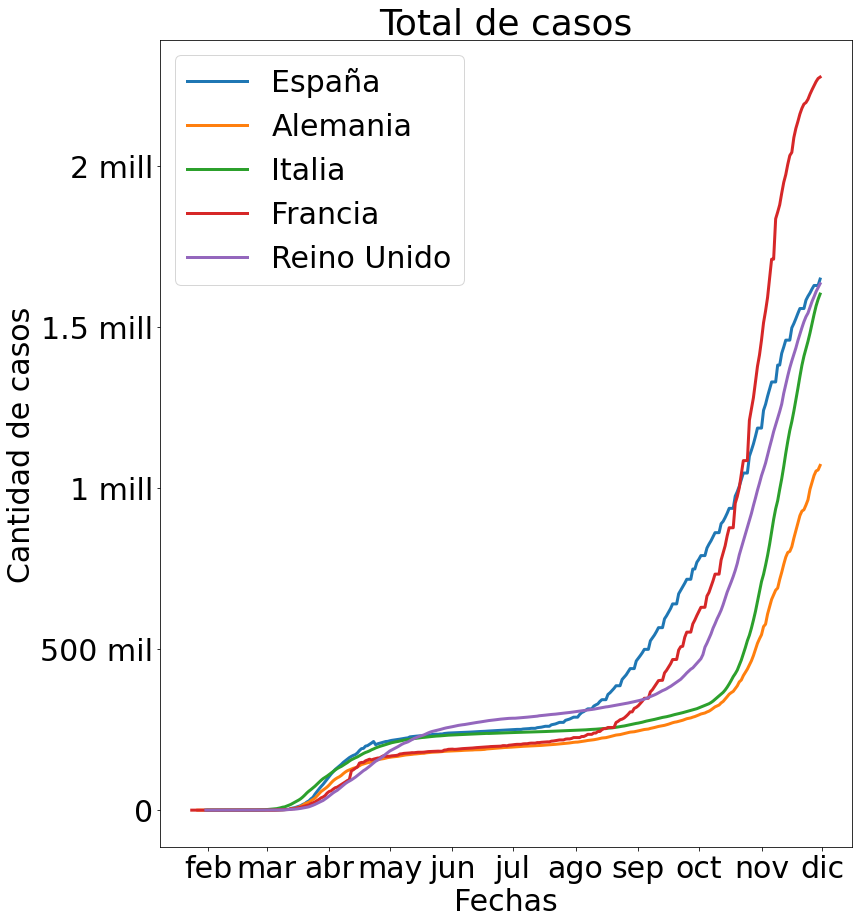

In [55]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0

x_es = datos_españa['date']
x_it = datos_italia['date']
x_ger = datos_alemania['date']
x_fr = datos_francia['date']
x_uk = datos_reinoUnido['date']

y_es = datos_españa['total_cases']
y_it = datos_italia['total_cases']
y_ger = datos_alemania['total_cases']
y_fr = datos_francia['total_cases']
y_uk = datos_reinoUnido['total_cases']

fig = plt.figure(figsize=(12,14))
ax = fig.add_axes([.1, .1, 0.8, 0.8]) # main axes

ax.set_xlabel('Fechas') # nombre eje x 
ax.set_ylabel('Cantidad de casos') # nombre eje y
ax.set_title('Total de casos') # nombre gráfica

ax.set_xticklabels(['feb','mar','abr','may','jun',
                    'jul','ago','sep','oct','nov', 'dic'])

ax.set_yticks([0,500000,1000000,1500000, 2000000])
ax.set_yticklabels(['0','500 mil','1 mill', '1.5 mill', '2 mill'])

plt.plot(x_es, y_es, lw=3,label = "España")
plt.plot(x_ger, y_ger, lw=3,label = "Alemania")
plt.plot(x_it, y_it, lw=3,label = "Italia")
plt.plot(x_fr, y_fr, lw=3,label = "Francia")
plt.plot(x_uk, y_uk, lw=3,label = "Reino Unido")
plt.legend()

plt.show()
fig.savefig("total_paises.png") # Calidad resolucion

### Ejercicio 2 
Ahora hacer lo mismo pero para los casos nuevos y no los totales, con todos los países

In [56]:
# Resolver

## Gráfica de barras


Podemos hacer una gráfica de barras de la siguiente manera, con **plt.bar()** en lugar de **plt.plot()** como habíamos hecho hasta ahora

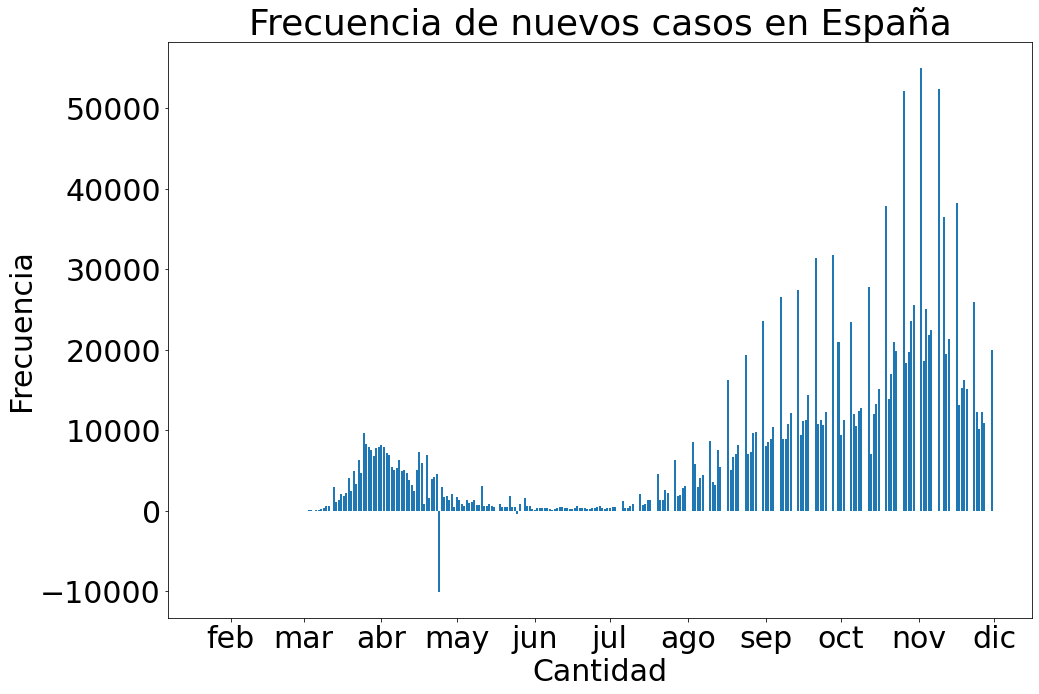

In [57]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0

x = datos_españa['date']
y = datos_españa['new_cases']

fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2]) # main axes

ax.set_xlabel('Cantidad') # nombre eje x 
ax.set_ylabel('Frecuencia') # nombre eje y
ax.set_title('Frecuencia de nuevos casos en España') # nombre gráfica

ax.set_xticklabels(['feb','mar','abr','may','jun',
                    'jul','ago','sep','oct','nov', 'dic'])

plt.bar(x, y)
plt.show()

Vemos que hay un valor negativo. No es extraño que al descargar datos de alguna fuente pueda tener errores, y esos hay que filtrarlos. Podemos buscar alguna forma que no afecte mucho a la gráfica, como la media entre el dato directamente posterior y el anterior. Aquí para no complicarnos mucho simplemente vamos a igualarlo a cero cualquier valor negativo y volver a imprimir todo. 

Para esta tarea volvemos a usar loc. Se puede hacer una condición que sólo te cojas las filas donde "new_cases" sea cero y sustituirlo. Para hacerlo más visible dividimos el proceso, pero es lo mismo que si lo escribimos todo en una línea.

In [58]:
condicion = datos_españa.new_cases < 0
columna = "new_cases"
valor_nuevo = 0

datos_españa.loc[condicion, columna] = valor_nuevo

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



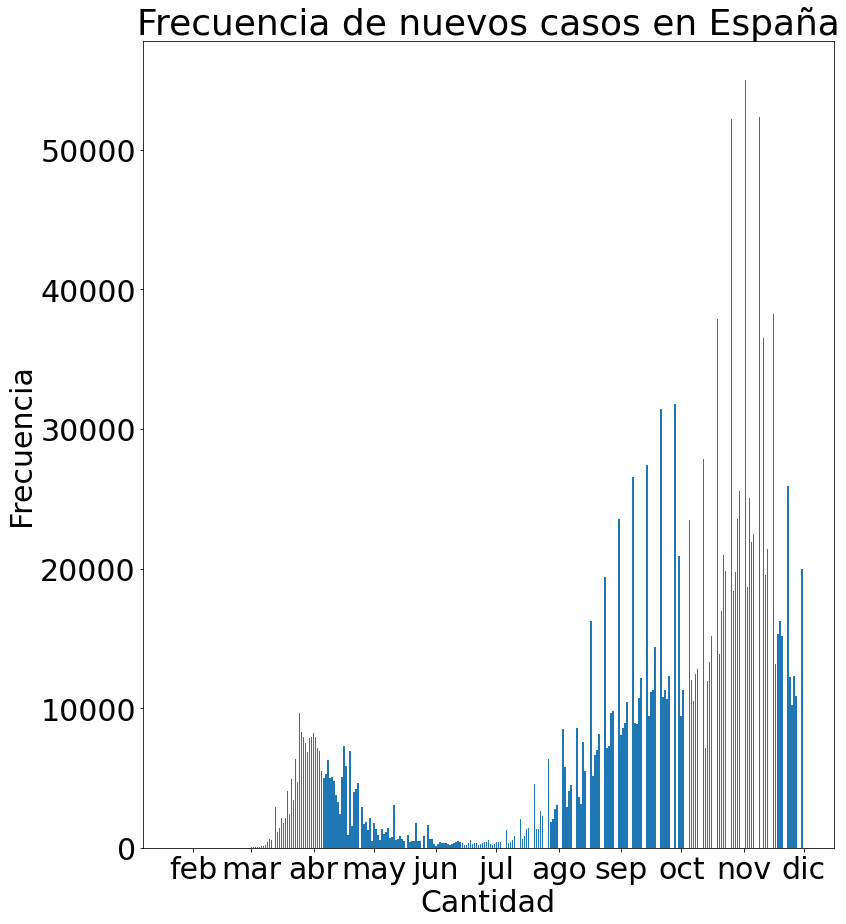

In [59]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0

x = datos_españa['date']
y = datos_españa['new_cases']

fig = plt.figure(figsize=(12,14))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.set_xlabel('Cantidad') # nombre eje x 
ax.set_ylabel('Frecuencia') # nombre eje y
ax.set_title('Frecuencia de nuevos casos en España') # nombre gráfica

ax.set_xticklabels(['feb','mar','abr','may','jun',
                    'jul','ago','sep','oct','nov', 'dic'])

plt.bar(x, y)
plt.show()
fig.savefig("nuevos_casos_barra.png") # Calidad resolucion

### Ejercicio 3
Ahora hacer lo mismo pero para los casos nuevos con una gráfica de barras pero con Estados Unidos

In [60]:
# Resolver

## Gráfica de queso

Ahora vamos a mostrar el número de casos totales por continentes respecto al total. En la fila cuya location es world podemos obtener el total. Para ello vamos a usar el método de Pandas **group_by**.

Como queremos los casos totales a día de hoy podemos simplemente seleccionar el último día de todos los datos. Aunque también se podría usar el valor máximo de los datos que debería concidir para el total de casos.

In [61]:
cond_dia = datos['date'].dt.day == 30
cond_mes = datos['date'].dt.month == 11
cond_año = datos['date'].dt.year == 2020
datos_ayer = datos[(cond_dia) & (cond_mes) & (cond_año)]
datos_ayer['date']

312     2020-11-30
625     2020-11-30
938     2020-11-30
1251    2020-11-30
1564    2020-11-30
           ...    
58667   2020-11-30
58980   2020-11-30
59293   2020-11-30
59607   2020-11-30
59920   2020-11-30
Name: date, Length: 191, dtype: datetime64[ns]

In [63]:
per_cont = datos_ayer.groupby('continent').sum()
per_cont

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,2174098.0,10521.0,13441.858,51993.0,269.0,286.431,125834.155,711.849,719.415,2151.575,13.936,12.431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3067587.0,17555.0,126.375,1.212,18655.0,0.759,0.307,389.1,691.20,1.339424e+09,5485.100,1166.6,198.141,119.214,288523.368,1398.1,15514.061,303.99,93.1,987.3,1106.832,60.220,3532.41,28.827
Asia,16749066.0,115440.0,124150.430,291704.0,1623.0,1704.005,495397.785,3780.281,4263.323,5081.662,44.462,48.946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212930693.0,1364702.0,4146.392,23.299,1692549.0,28.294,1.440,410.9,1010.66,4.599891e+09,19582.162,1387.3,280.009,181.366,976155.985,161.5,13353.214,411.48,182.6,1508.5,1779.323,124.930,3421.19,32.610
Europe,17342381.0,164650.0,206246.716,395268.0,4302.0,4962.144,1226508.256,13776.268,17058.444,21785.566,403.807,333.288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124107723.0,557108.0,5166.033,29.459,911280.0,42.573,3.211,205.4,814.34,7.481705e+08,26441.422,1682.8,708.785,459.074,1401145.971,27.1,9436.536,288.57,936.1,1423.7,281.862,222.078,3587.40,36.338
North America,15809571.0,177135.0,179972.430,402700.0,1635.0,2183.572,213686.096,1960.689,1775.306,5011.628,24.669,30.795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11475642.0,63070.0,304.054,1.671,76426.0,2.025,0.076,13.2,332.40,5.876635e+08,4278.681,664.9,185.404,117.551,376773.553,62.9,4402.487,246.86,90.1,267.7,1008.037,53.280,1734.47,17.163
Oceania,30691.0,28.0,18.714,942.0,0.0,0.143,1737.326,6.705,2.955,43.805,0.000,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11271768.0,24224.0,656.520,0.950,42403.0,2.656,0.001,1000.0,156.47,4.121881e+07,428.843,170.9,48.759,29.938,102207.756,40.2,2774.775,106.52,64.3,151.8,143.601,12.850,514.84,4.998
South America,11130276.0,38304.0,56985.858,325365.0,841.0,1080.857,201350.050,663.864,901.853,6511.193,19.508,20.588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11453766.0,70717.0,537.951,3.715,74047.0,3.976,0.075,53.8,303.25,4.304576e+08,292.704,362.6,99.327,62.232,166089.423,25.8,2247.887,93.73,98.4,197.3,395.944,24.820,901.09,9.010


Ya solo queda representar la gráfica de queso con el **plt.pie()**. Añadimos los colores, o con códigos que nos facilita el maplotlib, o si queremnos jugar con los colores podemos usar cualquier web que nos proporcione códigos RGB y pegarlo.

In [ ]:
# Gráficas de queso
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 30.0

values = per_cont.total_cases
colors = ['r', 'g', 'b', 'm', 'c','#B3AA19']
labels = per_cont.index
plt.pie(values, colors= colors, labels=labels)
fig = plt.gcf()
fig.set_size_inches(15,15) # Para cambiar el tamaño

plt.title('Reparto de casos totales en el mundo')
plt.show()
fig.savefig("reparto_queso.png") # Calidad resolucion

### Ejercicio 4 

Ahora hacer una gráfica de queso para los casos sólo de America del Sur.

      iso_code      continent  ... life_expectancy human_development_index
1878       ARG  South America  ...           76.67                   0.825
7201       BOL  South America  ...           71.51                   0.693
7514       BRA  South America  ...           75.88                   0.759
10018      CHL  South America  ...           80.18                   0.843
11897      COL  South America  ...           77.29                   0.747
15966      ECU  South America  ...           77.01                   0.752
22539      GUY  South America  ...           69.91                   0.654
42361      PER  South America  ...           76.74                   0.750
43926      PRY  South America  ...           74.25                   0.702
49562      SUR  South America  ...           71.68                   0.720
55536      URY  South America  ...           77.91                   0.804
57102      VEN  South America  ...           72.06                   0.761

[12 rows x 50 columns]
1

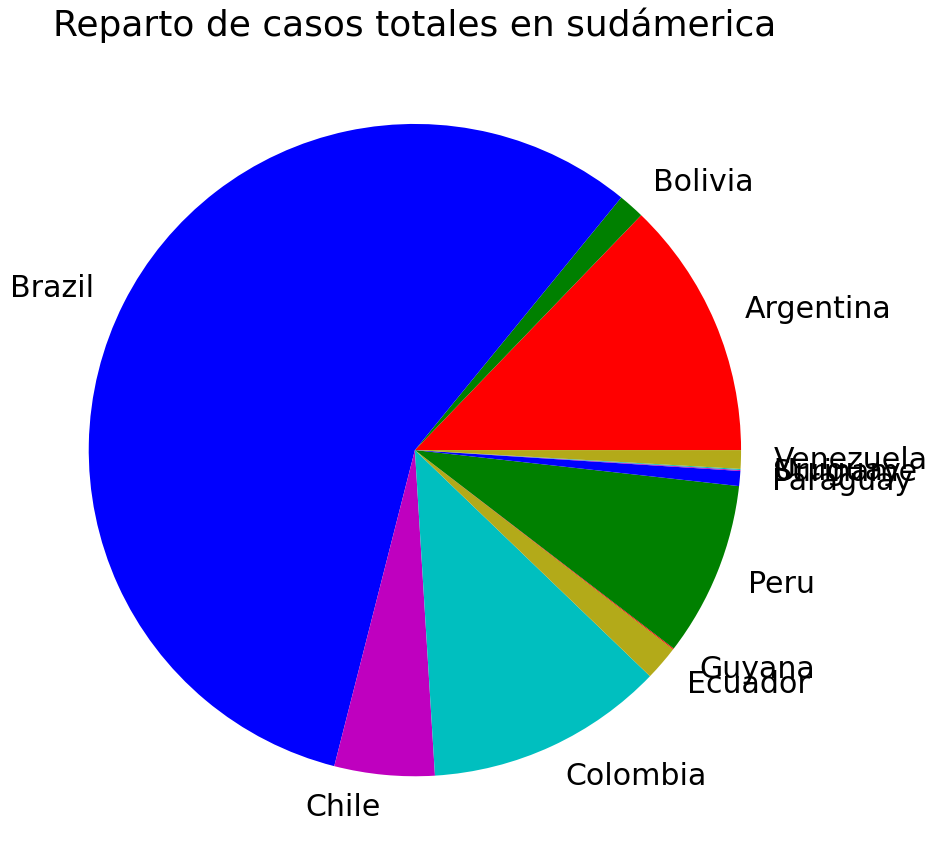

In [66]:
# Resolver
# Plantearnos como seleccionar países de Ámerica del Sur
# Gráficas de queso
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 30.0


cond_dia = datos['date'].dt.day == 30
cond_mes = datos['date'].dt.month == 11
cond_año = datos['date'].dt.year == 2020
datos_ayer = datos[(cond_dia) & (cond_mes) & (cond_año)]

datos_sur = datos_ayer[datos_ayer['continent']=='South America']



values = datos_sur.total_cases
print(len(datos_sur.total_cases))
colors = ['r', 'g', 'b', 'm', 'c','#B3AA19','r', 'g', 'b', 'm', 'c','#B3AA19']
print(len(colors))

labels = datos_sur['location']
plt.pie(values, colors= colors, labels=labels)
fig = plt.gcf()
fig.set_size_inches(15,15) # Para cambiar el tamaño

plt.title('Reparto de casos totales en sudámerica')
plt.show()
fig.savefig("reparto_queso.png") # Calidad resolucion


Ahora vamos a hacer más grande la representación y que sólo sea un anillo.

In [ ]:
# Gráficas de queso en forma de anillo
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 30.0

values = per_cont.total_cases
colors = ['r', 'g', 'b', 'm', 'c','#B3AA19']
labels = per_cont.index
plt.pie(values, colors= colors, labels=labels)

centre_circle = plt.Circle((0,0),0.70,fc='white') # Generamos un circulo blanco
fig = plt.gcf()
fig.set_size_inches(15,15) # Para cambiar el tamaño
fig.gca().add_artist(centre_circle) # Introducimos el cícrulo en el medio


plt.title('Reparto de casos totales en el mundo')
plt.show()
fig.savefig("reparto_anillo.png") # Calidad resolucion

## Gráfica puntos

Lo mismo, pero ahora vamos a usar los datos en concreto de muertes por millon de habitantes y casos por millon de habitantes. Tener claro las columnas a buscar, acuérdense que para ello podemos imprimirlas.

In [ ]:
datos_ayer.columns.values

Ahora vamos a seleccionar varios países como vimos anteriormente y, por ejemplo, el mes de octubre de 2020

In [ ]:
cond_mes = datos['date'].dt.month == 10
cond_año = datos['date'].dt.year == 2020
datos_intervalo = datos[(cond_mes) & (cond_año)]

datos_int_italia = datos_intervalo[datos_intervalo['location'] == 'Italy']
datos_int_alemania = datos_intervalo[datos_intervalo['location'] == 'Germany']
datos_int_francia = datos_intervalo[datos_intervalo['location'] == 'France']
datos_int_reinoUnido = datos_intervalo[datos_intervalo['location'] == 'United Kingdom']
datos_int_españa = datos_intervalo[datos_intervalo['location'] == 'Spain']


Generamos el código de igual forma que antes pero ahora vamos a usar el método **.scatter()** para las gráficas. Antes siempre hacíamos un **plt.plot()** por ejemplo, pero como ax es un objeto que sale del mismo padre tampoco pasa nada si donde añadimos los valores a la gráfica con **ax.scatter()**

In [ ]:
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0


cas_mill_es = datos_int_españa['total_cases_per_million']
test_mil_es = datos_int_españa['total_deaths_per_million']

cas_mill_uk = datos_int_reinoUnido['total_cases_per_million']
test_mil_uk = datos_int_reinoUnido['total_deaths_per_million']

cas_mill_it = datos_int_italia['total_cases_per_million']
test_mil_it = datos_int_italia['total_deaths_per_million']

cas_mill_ger = datos_int_alemania['total_cases_per_million']
test_mil_ger = datos_int_alemania['total_deaths_per_million']

cas_mill_fr = datos_int_francia['total_cases_per_million']
test_mil_fr = datos_int_francia['total_deaths_per_million']


fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2]) # main axes

ax.set_xlabel('Casos por millón') # nombre eje x 
ax.set_ylabel('Muertes por millón') # nombre eje y
ax.set_title('Total casos por millon entre muertes por millon') # nombre gráfica


ax.scatter(cas_mill_es, test_mil_es, lw=3,label = "España")
ax.scatter(cas_mill_ger, test_mil_ger, lw=3,label = "Alemania")
ax.scatter(cas_mill_it, test_mil_it, lw=3,label = "Italia")
ax.scatter(cas_mill_fr, test_mil_fr, lw=3,label = "Francia")
ax.scatter(cas_mill_uk, test_mil_uk, label = "Reino Unido")
plt.legend()
fig.savefig("muertes_casos.png") # Calidad resolucion

plt.show()


### Ejercicio 5 
Queremos lo mismo pero queremos ver la evolución de casos totales con punto de junio, julio y agosto

In [ ]:
# Resolver

## Plotly 

Ahora vamos a ver un ejemplo de una gráfica con Plotly para ver como funcionan. Recuerden que hay muchísimas librerías para la visualización de datos. Escoger una u otra ya es más decisión personal, en algunas sí encuentras diferencias, y sobre todo informarse, más porque lo que ahora mismo es lo mejor no signfica que sea mañana, y aunque las gráficas puedan ser más visuales luego entra la dificultad o no de programarlas, si la empresa continua desarrollando la librería sacando nuevas versiones mejorándola, etc., que te harán tomar una decisión.

Plotly en este caso nos va a facilitar, por ejemplo, no tener que definir los tamaño, pues se ajusta automáticamente, e igualmente podemos manipularla. Vamos a graficar los datos totales que usamos antes, en este caso para España e Italia.

Por un lado definimos los valores que vamos a mostrar con el **go.Scatter()**. Luego definimos la gráfica a usar dentro con el argumento *mode* que está en su interior. Si repetimos ese bloque, el de las trazas, podemos meter más países. Luego por ultimo en data, metemos cada traza en una lista que es lo que se pasará al **iplot()** que mostrará.

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly as ply
from plotly import subplots


datos_españa = datos[datos['location'] == 'Spain']
datos_italia = datos[datos['location'] == 'Italy']
datos_reinoUnido = datos[datos['location'] == 'United Kingdom']
datos_francia = datos[datos['location'] == 'France']
datos_dinamarca = datos[datos['location'] == 'Denmark']


x_es = datos_españa['date']
y_es = datos_españa['total_cases']

x_it = datos_italia['date']
y_it = datos_italia['total_cases']

x_den = datos_dinamarca['date']
y_den = datos_dinamarca['total_cases']



# Create traces
trace0 = go.Scatter(
    x = x_es,
    y = y_es,
    mode = 'lines',
    name = 'Total casos España'
)
trace1 = go.Scatter(
    x = x_it,
    y = y_it,
    mode = 'lines',
    name = 'Total casos Italia'
)

trace2 = go.Scatter(
    x = x_den,
    y = y_den,
    mode = 'lines',
    name = 'Total casos Dinamarca'
)

data = [trace0, trace1, trace2]

iplot(data)

### Ejercicio 6 
Añadir a la esta gráfica que acabamos de ver Reino Unido, Francia, Alemnania, Dinamarca y Bélgica

In [ ]:
# Resolver

# Bot Telegram

Ayer vimos que, como salida a este tipo de visualizaciones, se podía publicar gráficas en un cuadro de mando donde observar los resultados juntos para su análisis posterior.

Esto va a compañador un planificador de tareas que va actualizando estas gráficas. Básicamente se trata de un servidor que programas para que ejecute tal script a una hora en concreto, de cada día, o cada semana o cada mes. Como ejemplo sin entrar mucho en detalle porque no nos da tiempo material de tirar por ahí **Airflow** ([pincha aquí](https://www.paradigmadigital.com/dev/apache-airflow/) si quieres saber más).

### ¿Qué es un bot?
En pocas palabras, un bot (aféresis de robot) es un software que sirve para comunicarse con el usuario, imitando un comportamiento humano (aunque a veces sea el de un humano de pocas palabras). Estos programas funcionan dentro de otras aplicaciones y dan información y ayuda al usuario.

![bot.jpg](https://drive.google.com/uc?export=view&id=1G5V10OkwPk-8ZV2tLx343ESezxsVFqGg)


### ¿Qué es un bot de telegram?
Los bots de Telegram son una serie de aplicaciones de terceros que se ejecutan dentro de la aplicación de mensajería. No necesitas instalarlos ni hacer nada diferente para poder utilizarlos, ya que se integran de manera que se utilizan como si fueran una persona real con la que interactúas. Son multiplataforma, y los puedes usar en la versión de Telegram del sistema operativo que quieras.

### Tutorial para hacer un bot en Telegram

primeramente vamos a instalar la librería "Telepot" para comunicarnos con Telegram. Para ello debemos ejecutar la celda de abajo.

Al poner una "!" en Colab es como si ejecutaramos una orden en una terminal. Si instalas algo tienes que darte cuenta que cuanto se desconecta el colab se borra la instancia que estabas usando. Cuando vuelvas a abrir el colab tendrás que volver a instalar la librería.

In [ ]:
!pip install telepot

Abran Telegram. Usen el móvil mismo, pero para facilitar el copiar y pegar les recomendaría que usaran el https://web.telegram.org/

Una vez en Telegram web, busquen en el buscado de contactos botFather y entren.

![bot_in.jpg](https://drive.google.com/uc?export=view&id=1sEaauxcpbI_ojWUSEa4E3ZClqsjysQt9)

Sí, un bot para crear bots. Qué redundante.... 

![señor_meeseeks.jpg](https://drive.google.com/uc?export=view&id=19lKf9I9btX_0U1DvOW4rQSSRCUqpU8Zf)

A continuación le escriben para empezar comunicación.

    /start
![bot_1.jpg](https://drive.google.com/uc?export=view&id=1o6fm64mC8d-ImsBSm5aj33N3eCnyoKPA)

Te dirá que opciones que tienes. Nosotros queremos crear un nuevo bot

    /newbot
![bot_2.jpg](https://drive.google.com/uc?export=view&id=1bYCBAxct9tA5CHkms2O7RAD7xlbg8swy)

Te contestará que le digas como quieres llamar al Bot en sí que te conteste y luego que le pongas un nick al bot que acabas de crear. Atiendan a lo que les dice, el nick tiene que acabar en _bot o Bot.

![bot_3.jpg](https://drive.google.com/uc?export=view&id=1eCgipyWGhlNBYo-aU_Aq0KZDd6dyu288)

¡Felicidades! Ya tienes tu primer bot de Telegram. Pincha en el enlace al principio para poder hablar con tu bot y además copia el Token, que lo tendrás que pegar en una celda a continuación para poder programarlo.

![bot_4.jpg](https://drive.google.com/uc?export=view&id=1vaP-0o3a1nu0foyJ4CtqnQo6f5gVs5Vb)




Hagan todos los pasos anteriores e introduzcan el token generado, que es lo que va a usar el programa para comunicarse con el Bot 

¡NO USEN EL MÍO!

In [ ]:
# TOKEN = "1288760533:AAGCJFSYp9b4WjHdFflj4LyZCfYtGIx93eY" # Este es el mío. No usar
TOKEN = "1422900203:AAEIfBx9k1oUJUxERFDHbgyPOHpB-dS2LvA" # Peguen el suyo aquí

Bien, ya sín más preámbulos vamos a escribir el bot. En este caso escribiremos un bot que sólo lea el último mensaje que le hemos escrito y lo imprima por aquí cada vez que lo ejecutemos.

Vamos a usar funciones que aglutinen el código. Importante al principio inicializar el telepot y pasarle nuestro token para que esté conectado con **telepot.Bot(TOKEN)**

Cada función está comentada lo que hace

In [ ]:
"""
    Ejemplo 1 - Leer mensajes que se le envían al bot
"""
 
#Importar librerias
import telepot 
 
# Creamos el objeto telepot 
bot = telepot.Bot(TOKEN)

def update():
    '''
      Llamar al metodo getUpdates del bot, utilizando un offset
      :return: respuesta
    '''
    respuesta = bot.getUpdates(offset=0)
 
    #Devolver este respuesta
    return respuesta
 
 
def leer_mensaje():
    '''
      Lee el mensaje que se le ha enviado al bot
    '''
    # Obtnemos el último mensaje nada más
    mensaje = update()[-1]
    #Extraer el texto, nombre de la persona e id del último mensaje recibido
    #Recoger la info del mensaje (remitente, id del chat e id del mensaje)
    texto = mensaje["message"]["text"]

    #Devolver toda la informacion
    return texto
 
#Llamar a la funcion "leer_mensaje()"
texto = leer_mensaje()

print('Texto', texto)

Ahora, no sólo vamos a leer sino que además vamos a contestar. En concreto a hola y adiós. Añadimos la función enviar mensaje, que va a ejecutar la línea **bot.sendMessage(idchat, texto)** que envía el texto que queramos al chat que hemos creado. 

In [ ]:
"""
    Ejemplo 2 - Leer mensajes y responer
"""
 
#Importar librerias
import json

# Creamos el objeto telepot 
bot = telepot.Bot(TOKEN) 
 
def update(offset):
    '''
      Llamar al metodo getUpdates del bot, utilizando un offset
      :param offset: Esto indica el primer mensaje que quieres recibir
      :return: respuesta
    '''
    respuesta = bot.getUpdates(offset=offset)
 
    #Devolver este respuesta
    return respuesta
 
 
def leer_mensaje():
    '''
      Lee el mensaje que se le ha enviado al bot
      :return id_chat: Id del chat
      :return persona: nombre
    '''
    # Obtnemos el último mensaje
    mensaje = update(0)[-1]
    #Extraer el texto, nombre de la persona e id del último mensaje recibido
    #Recoger la info del mensaje (remitente, id del chat e id del mensaje)
    texto = mensaje["message"]["text"]
    persona = mensaje["message"]["from"]["first_name"]
    id_chat = mensaje["message"]["chat"]["id"]

    #Devolver toda la informacion
    return texto, id_chat, persona
 
def enviar_mensaje(idchat, texto):
    '''
      Llamar el metodo sendMessage del bot, 
      passando foto, el texto y la id del chat
      :param idchat: el id del chat, número
      :param texto: el texto a enviar
    '''
    bot.sendMessage(idchat, texto)
 
#Llamar a la funcion "leer_mensaje()"
texto, idchat, nombre = leer_mensaje()

#Generar una respuesta a partir de la informacion del mensaje
if "hola" in texto.lower():
    texto_respuesta = "¡Buenas " + nombre + "!"
    enviar_mensaje(idchat, texto_respuesta)
elif ("adios" in texto.lower()
      or "adiós" in texto.lower()):
    texto_respuesta = "Hasta pronto"
    enviar_mensaje(idchat, texto_respuesta)

Bien, pues ahora nos venimos arriba y vamos a programar un poco más complejo.

Primeramente queremos que esto este todo esperando que le preguntemos, así que vamos a programar un bucle **while** que siempre se va a mantener. Habría más formas, pero está es la más sencilla para el tutorial.

Para no estar enviando una petición en cada bucle, sino esperar a que haya algún mensaje nuevo le indicamos el offset y el timeout. Al hacer una conexión con el servidor, si no hay mensajes disponibles, la conexión se mantendrá hasta que llegue alguno (o hasta que se agote el tiempo de espera).

Hemos añadido un "info mensaje" para saber ciertos datos del mensaje, cosa que antes hacíamos en el propio leer, pero que divido para que se vea más claro.

"responder texto" coge lo que antes hacíamos por libre y lo mejora con un mensaje para diferentes tipos y enviando la gráfica, sí, las que construimos antes, que le pidamos.

In [ ]:
"""
    Ejemplo 3. Bot desarrollado
    Te contesta dependiendo del tipo de mensajes que le mandes y además
    te muestra gráficas si se lo pides
"""
 
#Importar librerias
import json
import telepot

#Variables para el Token y la URL del chatbot

# Creamos el objeto telepot 
bot = telepot.Bot(TOKEN)

 
def update(offset):
    '''
      Llamar al metodo getUpdates del bot, utilizando un offset
      :param offset: Esto indica el primer mensaje que quieres recibir
      :return: respuesta
    '''
    respuesta = bot.getUpdates(offset=offset, timeout=100)
 
    #Devolver este respuesta
    return respuesta
 

def info_mensaje(mensaje):
    '''
      Analizar el mensaje y devolver datos
      :param mensaje: el mensaje json que nos devuelve Telegram 
      :return tipo: Tipo de mensaje 
      :return id_chat: Id del chat
      :return persona: nombre
      :return id_update: El id del update 
    '''

    #Comprobar el tipo de mensaje
    if "text" in mensaje["message"]:
        tipo = "texto"
    elif "sticker" in mensaje["message"]:
        tipo = "sticker"
    elif "animation" in mensaje["message"]:
        tipo = "animacion" #Nota: los GIF cuentan como animaciones
    elif "photo" in mensaje["message"]:
        tipo = "foto"
    else:
        # Para no hacer mas largo este ejemplo, el resto de tipos entran
        # en la categoria "otro"
        tipo = "otro"

    #Recoger la info del mensaje (remitente, id del chat e id del mensaje)
    persona = mensaje["message"]["from"]["first_name"]
    id_chat = mensaje["message"]["chat"]["id"]
    id_update = mensaje["update_id"]

    #Devolver toda la informacion
    return tipo, id_chat, persona, id_update


def leer_mensaje(mensaje):
    '''
      Lee el mensaje que se le ha enviado al bot
      :param mensaje: En formato json
      :return texto: Lo que se escribio en string
    '''
    #Extraer el texto, nombre de la persona e id del último mensaje recibido
    texto = mensaje["message"]["text"]
 
    #Devolver las dos id, el nombre y el texto del mensaje
    return texto

def responder_texto(texto):
    '''
      Depende del tipo de texto se le responde una cosa u otra
      :param texto: Un string
      :return texto_respuesta: Lo que se le va a decir
      :return imagen: Si se le adjunta imagen. Puede que no haya
    '''
    if "hola" in texto.lower():
        texto_respuesta = "Buenas, " + nombre
    elif ("adios" in texto.lower() 
          or "adiós" in texto.lower()):
        texto_respuesta = "Hasta pronto"
    elif "buuum" in texto.lower():
        texto_respuesta = "Menudo leñazo"
    elif ("cómo estás" in texto.lower()
          or "como estas" in texto.lower()
          or "qué tal" in texto.lower()
          or "que tal" in texto.lower()):
        texto_respuesta = "Soy un bot bro, no tengo sentimientos jajaja"
    else:
        texto_respuesta = "Me has dicho: \"" + texto + "\""

    if "por continentes anillo" in texto.lower():
        imagen = "reparto_anillo.png"
    elif "por continentes queso" in texto.lower():
        imagen = "reparto_queso.png"
    elif "nuevos casos" in texto.lower():
        imagen = "nuevos_casos_barra.png"
    elif ("total casos por paises" in texto.lower() 
        or "total casos por países" in texto.lower()):
        imagen = "total_paises.png"
    elif "total casos españa" in texto.lower():
        imagen = "total_es_3.png"
    elif "muertes por casos" in texto.lower():
        imagen = "muertes_casos.png"
    else:
        imagen = ''

    return texto_respuesta, imagen

def enviar_mensaje(idchat, texto, imagen=''):
    '''
      Llamar el metodo sendMessage del bot, 
      passando foto, el texto y la id del chat
      :param idchat: el id del chat, número
      :param texto: el texto a enviar
      :param imagen: la imagen a enviar. No tiene por qué haber
    '''
    bot.sendMessage(idchat, texto)
    # Por si no se ha cargado una gráfica o se ha reiniciado y no se han
    # ejecutado todos los bloques hacemos un try-except. 
    # En vez de saltar el error si no existe la 'imagen.png'
    # continua el programa
    try:
      if imagen:
        bot.sendPhoto(idchat, photo=open(imagen, "rb"))
    except:
      pass

#Variable para almacenar la ID del ultimo mensaje procesado
ultima_id = 0

# Bucle para mantener el proceso constante 
while(True):
    respuesta = update(ultima_id)
    for i in respuesta:
 
        #Guardar la informacion del mensaje
        tipo, idchat, nombre, id_update = info_mensaje(i)
  
        #Generar una respuesta dependiendo del tipo de mensaje
        if tipo == "texto":
            texto = leer_mensaje(i)
            texto_respuesta, imagen = responder_texto(texto)
        elif tipo == "sticker":
            texto_respuesta = "jajajajaja"
        elif tipo == "animacion":
            texto_respuesta = "Me encanta"
        elif tipo == "foto":
            texto_respuesta = "Preciosa la foto"
        elif tipo == "otro":
            texto_respuesta = "Ni idea lo que me has mandado en verdad"
 
        # Si la ID del mensaje es mayor que el ultimo, se guarda la ID + 1
        # Necesario para que cada vez no vaya a responder a todos los mensajes
        if id_update > (ultima_id-1):
            ultima_id = id_update + 1
 
        #Enviar la respuesta
        enviar_mensaje(idchat, texto_respuesta, imagen)
 

### Ejercicio 7
Añadir más frases:

- Que te conteste "Buenos días" si tu le dices buenos días
- Que al decirle "Hasta luego" también te diga adiós 

In [ ]:
## Resolver

Y aquí acabamos nuestro primer bot que envía gráficas que le preguntemos.

![bojack.gif](https://drive.google.com/uc?export=view&id=1VV8W1TpdR8fcuV8aUSIQ3qr6oekWEMmi)

